In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from skimage.feature import hog
from skimage import data as skim_data 
from skimage import color, exposure
from sklearn.decomposition import PCA

###########################################

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

###########################################

# Imports
import numpy as np
import tensorflow as tf
import csv

######################################
from skimage import data, io, color, exposure
from skimage.transform import resize, rescale, rotate, setup, warp, AffineTransform

In [17]:
im_inds = []
im_names = []
im_prices = []
with open('../datasets/bikes_filtered.csv', 'r') as f:
        datareader = csv.reader(f)
        for line in datareader:
            im_inds.append(line[0])
            im_names.append(line[1])
            im_prices.append(line[2])
            
images = []

for i in range(0, len(im_inds)):
    #print(i)
    im_ind = im_inds[i]
    image_file = '../datasets/bikes_im/' + str(im_ind) + '.jpg'
    curr_im = color.rgb2gray(imread(image_file))
    resized_im = resize(curr_im, (224,224))
    images.append(resized_im)
    
    if i % 1000 == 0:
        print(i)
    
#reize 224x224

#images.append(color.rgb2gray(skim_data.astronaut()))
#images.append(color.rgb2gray(skim_data.camera()))

hog_array = np.zeros((len(images), 224*224))
print("hogarray")
print(hog_array)

for i, image in enumerate(images):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                        cells_per_block=(1, 1), visualise=True, block_norm='L2-Hys')
    flattened_len = int(hog_image.shape[0]) * int(hog_image.shape[1])
    pixels = np.reshape(hog_image, (-1, flattened_len))
    hog_array[i, :] = pixels
    
    if i % 1000 == 0:
        print(i)

pca = PCA(n_components=2)
pca.fit(hog_array)
hog_images_compressed = pca.transform(hog_array)
print("hog_images_compressed")
print(hog_images_compressed)
#flatten



/Users/Edward_Chou/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
hogarray
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
hog_images_compressed
[[-0.55960866 -0.30850907]
 [-0.64592953 -0.38064393]
 [-0.64592953 -0.38064393]
 ..., 
 [ 0.25132051 -0.04987339]
 [ 0.28289648 -0.03216354]
 [ 0.32871061  0.04304362]]


In [18]:
pca = PCA(n_components=200)
pca.fit(hog_array)
hog_images_compressed = pca.transform(hog_array)

In [24]:
print(hog_images_compressed.shape)
print(pca.components_.shape)

(21843, 200)
(200, 50176)


In [25]:
np.save("hog_images_compressed", hog_images_compressed)
np.save("pca_components", pca.components_)

1300 3014.07303069
70 2624.44023321
70 2624.44023321
80 -408.266154902
80 228.839871787
81 657.014417166
90 379.941927741
90 509.918078277
100 394.435576586
100 326.506956547
100 203.45740603
100 871.255536406
100 909.500266584
100 798.211749669
100 909.500266584
100 798.211749669
105 685.613036406
109 1868.82732838
110 1733.4971555
110 1733.4971555
110 651.567889794
110 77.7840287231
110 466.276707144
110 -408.266154902
110 -216.834045179
110 980.747260259
110 989.199967066
110 -18.4439483132
110 1183.35147264
110 194.902570996
110 -56.3900850335
110 82.7348631917
110 189.55477015
110 1183.35147264
110 194.902570996
110 -56.3900850335
110 1343.04513939
110 1343.04513939
110 704.765666801
110 704.765666801
110 3861.04926732
115 2108.48311878
115 1496.28604865
115 865.333510368
115 -630.99480173
115 1028.78426583
115 326.737383984
115 326.737383984
115 -122.664734459
115 49.5948601109
115 127.065063115
115 -149.13673792
116 -500.306749979
120 750.105006106
120 916.40883122
120 677.84812

250 -802.800117916
252 328.617261021
254 982.273921016
255 449.958865851
255 1058.2317451
257 1110.45967202
259 -106.295301699
259 -88.8869001592
259 -88.8869001592
259 -144.686940484
259 30.4816334976
259 331.697914073
259 -88.8869001592
259 -88.8869001592
259 -496.096484825
259 -496.096484825
259 1516.66202099
259 1073.19932245
260 541.674516834
260 268.798008123
260 270.035950079
260 42.144724194
260 278.020885963
260 680.961958689
260 -452.52880343
260 1101.03017456
260 -503.193725058
260 -553.994245676
260 408.041132452
260 120.611698367
260 1479.24185635
260 -86.2548579054
260 11.7995871105
260 1008.87006035
260 966.271965642
260 657.45382236
260 711.913929625
260 712.433276459
260 678.349055532
260 254.337860732
260 243.948603636
260 463.992423195
260 463.992423195
260 756.490978639
260 210.381294934
260 33.821141357
260 429.641615091
260 420.478977524
260 568.044418373
260 727.865400501
260 690.966152421
260 -109.598496034
260 -109.598496034
260 592.412460236
260 765.549685823


300 1053.39416248
300 -45.4443152253
300 856.768119199
300 817.056144179
300 907.923081941
300 -244.86615729
300 -359.062751366
300 1751.89061452
300 954.454051367
300 737.475118394
300 230.975194137
300 1167.03669192
300 7.49783012173
300 719.066928352
300 119.166388594
300 499.373106033
300 536.741825319
300 -513.464520338
300 1492.57458265
300 695.744058542
300 1083.98066848
300 532.861335088
300 448.511277441
300 -87.0586601716
300 -15.3234912097
300 -22.6748721096
300 -824.896578417
300 272.352417268
300 -184.488739292
300 409.007553016
300 52.6865886318
300 409.007553016
300 -331.156700951
300 538.847924253
300 636.967954462
300 1504.79634781
300 531.163614284
300 1040.71582218
300 969.614754951
300 413.438863516
300 243.483107135
300 -115.544634147
300 474.350992752
300 1308.55855356
300 52.6865886318
300 370.809658951
300 370.725476851
300 742.343118709
300 1384.90063034
300 348.3432096
300 270.007781217
300 24.0708718327
300 111.978980427
300 746.672998103
300 -83.605048177
30

339 53.965065934
339 668.287163186
339 -201.152993279
339 779.958372698
339 779.958372698
340 850.878697471
340 392.29802636
340 -190.474236605
340 572.101959075
340 3349.8973251
340 1032.33329062
340 691.111950916
340 208.497720408
340 729.955921282
340 14.0033556939
340 729.339939959
340 -81.6134710209
340 601.067087242
340 2419.31357453
340 735.684168242
340 225.343814177
340 1816.80318524
340 600.193495341
340 -28.4965778686
340 812.873690453
340 2864.51918982
340 -402.415508227
340 428.199479013
340 1459.62734695
340 1459.62734695
340 389.389876653
340 658.232240073
340 436.307402973
340 495.719001273
340 574.743464033
340 1587.64767634
340 1447.48541392
340 952.979063293
340 164.935636618
340 562.284040343
340 675.468471148
340 284.294386718
340 703.758285468
340 806.00107121
340 729.339939959
340 -81.6134710209
340 235.952296123
340 -396.180410944
340 240.041884967
340 1066.81491258
340 65.7979779693
340 934.270802061
340 1018.44611245
340 1130.72815147
340 515.160803862
340 584

379 136.845548526
379 136.845548526
380 1048.2172215
380 517.851683292
380 608.647827608
380 366.236886828
380 206.532677874
380 1024.11884171
380 848.124271901
380 1205.01745962
380 44.5648912444
380 113.373105079
380 252.232420248
380 1804.83514525
380 891.174381916
380 498.916225691
380 1614.97560711
380 -9.78317512165
380 -619.494117559
380 -262.801599
380 457.72123128
380 328.529487452
380 328.529487452
380 -53.5464418565
380 -16.7215712786
380 868.75175739
380 1101.43649967
380 985.420074818
380 1344.58040944
380 296.491159536
380 1078.61714179
380 1078.61714179
380 897.483614258
380 608.715944439
380 194.202796324
380 -69.147609934
380 -69.147609934
380 429.064712038
380 859.415482838
380 -32.2960701122
380 756.211111453
380 -325.4556162
380 101.881818181
380 449.481161973
380 108.51424997
380 392.523320312
380 392.523320312
380 320.190399128
380 775.644105336
380 775.644105336
380 1078.61714179
380 1078.61714179
380 897.483614258
380 -614.7706415
380 388.089837373
380 457.70816

410 898.102339771
410 -260.34841631
410 898.102339771
410 275.184849071
410 1666.54972108
410 -165.086047672
410 -165.086047672
410 644.925306093
410 457.248094564
410 471.196054296
410 -82.4288220116
410 471.196054296
410 -82.4288220116
410 8.04246029059
410 609.947547623
410 913.011988613
410 664.513942048
410 772.919683044
410 561.567656552
410 474.790249466
410 609.947547623
410 357.987400616
410 1343.67086037
410 1063.48632303
410 299.069344137
410 87.5879934418
410 1268.69087732
410 -221.291909096
410 -221.291909096
410 1663.85539384
410 1394.86989859
410 1169.39699075
410 1223.18655632
410 1544.47366468
410 1195.2869637
411 1754.84087215
411 2030.87063788
412 422.511282097
415 1129.85632491
415 1129.85632491
415 418.954169738
415 982.456203937
415 1192.23353641
415 372.467767945
415 929.407975045
415 -5.44327664762
415 1111.47844371
415 904.132987884
415 1015.58623837
415 880.115838419
415 1111.61649333
415 1111.61649333
415 241.106902399
415 145.42250283
416 633.717801393
419 4

450 88.5712015029
450 516.256483226
450 1281.41203901
450 1190.26567388
450 560.286087491
450 680.146405308
450 916.361521205
450 1223.68028895
450 238.800877608
450 895.264428863
450 1520.92400012
450 1164.79771671
450 508.671908843
450 757.220050602
450 573.647554785
450 772.356998779
450 852.471481204
450 1138.61981786
450 780.566246667
450 587.945702726
450 807.822110643
450 606.178090743
450 890.652707532
450 1203.26691314
450 801.971198091
450 963.040833971
450 485.238542562
450 -124.137629714
450 767.03565039
450 426.096966888
450 194.717275352
450 1272.96173125
450 367.127771641
450 617.005240044
450 568.201179192
450 756.771880932
450 -246.344632509
450 28.1929258633
450 208.547935233
450 -46.3910883933
450 375.743695354
450 736.391036692
450 820.999585402
450 798.37001524
450 1077.79335473
450 768.756872069
450 477.779653993
450 418.882795161
450 64.8188016602
450 1330.04802741
450 634.100949208
450 1515.4040226
450 457.727036274
450 326.851731278
450 1437.58038809
450 1040.3

490 761.07868786
490 802.376668416
495 1011.64153404
495 896.417280257
495 1228.55404347
495 896.417280257
495 -337.66989076
495 2748.30518497
495 1320.24981178
495 1721.01729652
495 1499.79859828
495 909.336052602
495 272.170909431
495 1264.07381388
495 1264.07381388
495 675.743194544
495 1140.05286775
495 -129.261900754
496 558.658805317
499 360.548458968
499 147.044151847
499 497.794050451
499 3858.4861092
499 -100.488339421
499 2337.1549729
499 2293.3689215
499 -112.626732653
499 1683.24230817
499 965.909730944
499 499.712931535
499 5096.83151052
499 5096.83151052
499 5096.83151052
499 1682.75650585
499 2062.82299065
499 753.63328715
499 753.63328715
499 753.63328715
499 1189.96689653
499 878.862351734
499 498.973820997
499 1598.19121375
499 -456.322237574
499 1270.68794643
499 446.318092129
499 -220.431058583
499 386.242756634
499 173.598055462
499 305.388397027
499 173.598055462
499 305.388397027
499 1073.52727229
499 979.342275417
499 988.799069513
499 1640.73998426
499 1514.837

540 827.464128828
540 132.97362055
540 441.996074054
540 -411.863769295
540 -105.922913183
540 1065.02987765
540 1042.43034203
540 132.97362055
540 441.996074054
540 662.938220549
540 1451.46985686
540 2285.36570697
540 230.827912954
543 371.266979437
545 571.517601444
545 1303.63936101
545 203.866021656
545 186.591088027
545 165.13448482
545 1789.05170928
545 467.207734202
545 2441.17522636
545 974.830779652
545 974.830779652
545 2441.17522636
545 -413.160513163
545 1392.18357564
545 656.897736355
545 361.564257675
545 356.547030505
545 34.7646405743
545 1002.98735743
545 1527.87633239
545 862.597035046
546 310.536252491
546 310.536252491
549 181.286380357
549 640.591806185
549 669.388649262
549 723.803245088
549 597.544028002
549 723.803245088
549 2590.39538434
549 2546.4303619
549 2196.66168062
549 2644.38633395
549 866.49616634
549 866.49616634
549 866.49616634
549 1428.66990992
549 1034.71570571
549 801.795269636
549 247.088241845
549 1039.55722231
549 483.994701116
549 1205.54471

609 1415.26955455
609 1415.26955455
609 363.024971487
610 2008.41707978
610 1735.92720069
610 1789.70197958
610 1735.92720069
610 1789.70197958
610 1468.14905457
610 1796.6443976
610 -216.928366916
610 2006.80143397
610 1249.53603539
610 275.687503668
610 -190.868701787
610 1644.26240124
610 -69.8970746946
610 1261.4866901
610 464.454601001
610 299.086315317
610 571.199339553
610 450.733944544
610 1558.3896395
610 1833.36100061
610 1833.36100061
610 1550.29773547
610 933.342466956
610 1912.72157015
610 1261.4866901
610 1853.67151919
610 459.995720836
610 575.776777981
610 711.660847744
610 346.66445648
610 1417.91014019
610 -347.701701011
610 1417.91014019
610 225.637347967
610 1158.98595413
610 631.278318742
610 659.023134145
610 1222.90886471
610 520.595536894
610 1303.128486
612 601.27474614
613 768.504557874
615 1566.27392054
615 1566.27392054
615 1149.85103657
615 1803.11471441
615 1999.36678056
616 282.110820122
616 282.110820122
616 26.5688547397
617 2191.22443418
619 773.784554

670 963.02538712
670 -428.370377746
670 1277.7013934
670 792.849371665
670 792.849371665
670 621.63107143
670 621.63107143
670 621.63107143
670 573.161424835
670 -118.225833862
670 -118.225833862
670 776.210314294
670 367.148396074
670 797.302649993
670 235.289457556
670 244.635083851
670 1609.1092355
670 1478.49148025
670 2218.49854265
670 -62.1018902171
670 1701.96280981
670 908.234474309
670 502.369027677
670 7248.43587471
671 61.1756674878
671 770.036514905
671 552.332706219
673 1458.27225114
673 1458.27225114
673 1458.27225114
673 1458.27225114
674 -24.0743101304
674 108.165108915
675 493.845846417
675 1072.44495748
675 1492.62544051
675 -150.672107668
675 663.544785719
675 238.205185323
675 152.497699172
675 1492.62544051
675 2060.18795108
675 1225.5795088
675 1033.37239117
675 1026.36516369
675 810.278874783
675 2065.175509
675 810.278874783
676 1000.1577969
679 1271.45209446
679 2355.96722699
679 3076.25842939
679 2038.70361718
679 427.660643545
679 -222.826275539
679 919.50426

740 1328.86554448
740 918.583562181
740 1107.69517887
740 1065.54965635
740 1916.06902143
740 1581.62966618
740 362.189801609
740 362.189801609
740 1800.06884214
740 1641.3544945
740 1800.06884214
740 1800.06884214
742 597.744023532
742 645.276433117
745 -2.20276425294
745 545.555758337
745 -2.20276425294
749 1425.18697593
749 1296.74421793
749 983.688816505
749 1394.00479871
749 1172.37645394
749 1862.43991404
749 969.007541194
749 2671.13202919
749 1378.67889782
749 1357.81814008
749 1413.15928725
749 1413.15928725
749 1413.15928725
750 899.446996901
750 1359.46843163
750 636.420673878
750 867.207192931
750 1238.07032064
750 797.472001161
750 797.472001161
750 742.479153994
750 1950.57615218
750 820.082257753
750 361.859481708
750 701.255267685
750 610.939561905
750 1061.59005612
750 -138.660351626
750 1146.09951027
750 2169.70869844
750 997.67327111
750 -90.0562526791
750 2731.97125753
750 554.14269548
750 554.14269548
750 1598.78266074
750 1745.9089272
750 1382.01554939
750 844.875

800 627.908004487
800 1054.19300624
800 836.987367625
800 492.710864091
800 2086.82932231
800 549.609127873
800 1161.47759384
800 1161.47759384
800 902.02065878
800 2550.05069573
800 2311.80569153
800 2838.38788076
800 770.502862998
800 2750.43273884
800 1031.84971318
800 847.413949569
800 399.956417399
800 622.941505049
800 1989.7768188
800 1408.95234541
800 829.96228004
800 1408.95234541
800 1511.69371863
800 1070.15450346
800 2838.38788076
800 770.502862998
800 483.88568477
800 515.148751097
804 901.189465822
809 1794.11936389
809 1083.31466629
809 1706.59085873
809 1262.66016475
810 1723.01487227
810 1782.82183517
810 1022.81398874
810 901.87782012
810 154.781731178
810 364.867751629
810 364.867751629
810 1057.71049586
810 1057.71049586
810 1849.13169076
810 493.389297876
810 362.549621303
810 399.959730902
810 1723.01487227
810 1782.82183517
810 2161.08078436
810 573.209948063
810 1484.95103081
810 72.2285430749
810 398.067128155
810 606.317725031
810 1258.47473399
814 2065.058412

900 638.31167919
900 1323.3643305
900 1441.91413847
900 938.372868178
900 1227.06623005
900 1447.93609289
900 872.382899444
900 557.905800698
900 283.632022429
900 1545.95012341
900 1899.92138911
900 2262.14588506
900 632.124601694
900 468.32338802
900 1048.70147862
900 310.36852658
900 1545.95012341
900 632.124601694
900 622.246200036
900 563.173451635
900 570.272084896
900 904.394724857
900 965.930075463
900 225.686086988
900 563.024794764
900 625.036693178
900 430.232955331
900 394.736531353
900 394.736531353
900 2329.91097239
900 333.938166308
900 2422.8777566
900 1062.3667783
900 1078.08850767
900 958.314552028
900 949.586286042
900 2415.01927874
900 2415.01927874
900 3062.18608894
900 1631.07033609
900 1707.47637389
900 1275.66011934
900 1128.92931118
900 1024.67953206
900 768.65523035
900 974.061480138
900 974.061480138
900 1149.02352473
900 614.371786847
900 872.596125321
900 830.307803723
900 386.10072072
900 954.906854491
900 1879.7168761
900 1456.16150891
900 876.495428537
9

1000 1012.69959267
1000 1162.12049531
1000 1236.22394234
1000 1593.69573737
1000 183.349803765
1000 858.970976313
1000 708.617340572
1000 1524.43449519
1000 599.710606059
1000 599.710606059
1000 1010.63883875
1000 522.498834567
1000 723.131671439
1000 1236.22394234
1000 1010.63883875
1000 287.395223539
1000 707.503391584
1000 446.998395388
1000 418.673677166
1000 898.339866008
1000 692.129061181
1000 535.190556271
1000 1151.03905004
1000 937.177753077
1000 751.588818356
1000 751.588818356
1000 2572.66976296
1000 229.140368348
1000 2138.64742815
1000 2004.26612556
1000 2700.20173444
1000 2258.37302862
1000 1649.56995624
1000 1837.83459747
1000 1811.43719738
1000 2138.64742815
1000 3113.62276399
1000 436.719628773
1000 416.024045586
1000 360.511536264
1000 360.511536264
1000 360.511536264
1000 2237.15636915
1000 1060.8859294
1000 1060.8859294
1000 1041.35910291
1000 969.711187217
1000 2785.27994834
1000 1163.0697799
1000 1618.9184848
1000 966.515378916
1000 2729.95786602
1000 1427.125408

1100 2417.6137349
1100 2081.39318036
1100 1296.58401702
1100 2648.36357256
1100 -468.776840895
1100 2868.79069773
1100 1721.49686391
1100 1741.50219198
1100 1061.6298561
1100 755.874889756
1100 1692.4391882
1100 1020.86680365
1100 2121.45024664
1100 1932.29903942
1100 2740.83770917
1100 2309.69432124
1100 792.02067927
1100 2787.68844986
1100 1547.98567989
1100 1925.39286725
1100 1069.39659354
1100 1894.6023637
1100 1811.47154962
1100 1692.4391882
1100 2465.16782138
1100 1990.73109883
1100 2465.16782138
1100 1229.44908712
1100 152.453531539
1100 1970.46749656
1100 2490.3180659
1100 1806.85682297
1100 1806.85682297
1100 940.45918146
1100 2455.2178768
1100 1572.90864245
1100 2878.37535959
1100 2402.52117898
1100 989.006188966
1100 2402.52117898
1100 1215.07298344
1100 1862.27958468
1100 1057.32855866
1100 1203.64425165
1100 205.51157367
1102 2597.33056993
1112 904.887738977
1115 961.138173103
1115 1876.00960432
1115 2190.24724467
1116 1194.42857418
1120 1087.57964623
1120 2447.65652542
11

1300 2038.66373249
1300 2447.56279163
1300 2304.78201187
1300 2693.6849978
1300 2409.46010952
1300 1543.29624111
1300 2849.8843887
1300 2479.7932994
1300 2479.7932994
1300 818.49699115
1300 1159.050234
1300 3295.60692794
1300 3295.60692794
1300 2138.09709178
1300 713.319472876
1300 1380.38058073
1300 742.734173768
1300 1973.41577522
1300 267.660168635
1300 2510.91986608
1300 2510.91986608
1300 1557.31719787
1300 2375.48127612
1300 2375.48127612
1300 2596.74197052
1300 1337.46769395
1300 2574.76829025
1300 2725.84601476
1300 2903.64184163
1300 2491.29240257
1300 2919.60862569
1300 2010.08745604
1300 2491.29240257
1300 2919.60862569
1300 2010.08745604
1300 2909.29824682
1300 2145.29888656
1300 2400.34064288
1300 1826.16551584
1300 1209.58769921
1300 1896.35938842
1300 2869.81194728
1300 2423.39126615
1300 2482.96131174
1300 2168.94158072
1300 2491.29240257
1300 2919.60862569
1300 2010.08745604
1300 1627.86990962
1300 916.288027166
1300 458.717821431
1300 1658.32494894
1300 2524.52422041


1450 1005.55414287
1450 1603.17289115
1450 1603.17289115
1450 967.916793419
1460 2074.27053803
1460 1746.14626704
1460 1612.8268349
1469 1736.14579385
1469 2531.39566081
1470 2484.33891529
1470 1781.45776423
1470 2500.7742393
1470 2566.64697452
1470 3259.46052882
1470 509.520103317
1470 946.353489208
1470 2875.75515778
1470 1605.78365317
1475 1812.25100387
1475 1812.25100387
1475 1409.82382008
1475 1476.69911809
1475 2115.97051952
1475 1476.69911809
1475 2227.89969184
1475 2272.71773009
1480 2514.88273965
1480 1974.39993314
1480 2153.16919257
1480 2764.08926862
1480 2059.20247794
1480 2202.22769292
1480 2059.20247794
1480 2059.20247794
1480 2202.22769292
1480 2059.20247794
1480 2124.75266429
1485 3104.62428813
1485 3253.98572016
1485 2031.91206922
1485 1261.98465317
1489 1773.46469735
1489 1773.46469735
1490 2098.65655523
1490 2033.76470152
1490 2098.65655523
1490 2033.76470152
1490 1783.58289165
1490 1881.63507856
1490 1881.63507856
1490 1764.30184392
1492 3035.75019129
1495 2294.0793

1650 683.522342221
1650 1371.0941107
1650 1170.21078754
1650 2854.91860134
1650 2010.56137466
1650 1461.81256041
1650 3803.72137764
1650 1866.99542349
1650 2603.708961
1650 3118.95568386
1650 2499.2317632
1650 1574.39052993
1650 2262.82467407
1650 3000.60248659
1650 2439.6259833
1650 2070.78010885
1650 2032.15145917
1650 3083.08206835
1650 1881.57438904
1650 1879.53643434
1650 2444.51541963
1650 2037.39084328
1650 1842.20147268
1650 2243.83566689
1650 1815.75342005
1650 1578.13292811
1650 1148.83875354
1650 2243.83566689
1650 1815.75342005
1650 1578.13292811
1650 810.186819056
1650 1665.09487233
1650 2271.25905981
1650 597.6504634
1650 2784.59891363
1655 2163.87976106
1659 2925.38161157
1659 3415.28410635
1660 4077.08362909
1660 256.562910907
1670 2427.55608227
1670 1297.77621916
1675 3155.20028035
1675 1296.76358655
1680 2328.8211923
1680 2328.8211923
1680 3143.44267441
1680 3041.46576484
1680 3041.46576484
1680 692.958044053
1680 692.958044053
1680 2499.14803199
1680 2617.05167821
16

1870 3631.92199079
1870 2116.1399248
1870 4222.38436365
1870 3589.76069188
1870 2508.41077911
1870 3094.21575492
1870 2896.72207336
1870 1254.27283091
1870 1639.10387894
1870 56.6294144862
1875 3264.63176188
1875 3660.03365494
1875 1268.87866075
1879 3046.0237732
1879 3119.26454859
1879 2318.87079936
1880 1175.47725632
1880 1809.27720256
1883 1689.74499925
1883 2752.47932354
1885 3240.48059609
1885 1935.19530593
1890 3832.05166815
1894 1175.70780874
1895 1502.99554495
1895 3448.28319559
1895 1465.8002472
1895 3012.02787691
1895 3165.06940045
1895 3165.06940045
1895 2239.45365259
1896 2892.99479582
1899 1544.24146379
1899 2456.28905497
1899 2456.28905497
1899 2456.28905497
1899 3413.40841237
1899 2966.61473318
1899 1236.72591913
1899 1619.41951902
1899 3274.10468732
1899 1169.21808948
1899 2514.12221294
1899 1529.92639783
1899 1762.55459929
1899 1611.89422523
1899 899.037280587
1899 2210.05977197
1899 1664.51379806
1899 3461.50251536
1899 3096.24190743
1899 3017.50705118
1899 1547.62090

2100 2144.52618174
2100 4023.63106944
2100 3398.24182813
2100 3016.86809516
2100 1528.33036761
2100 1944.51404401
2100 1925.06380698
2100 2816.59420774
2100 1766.13969227
2100 3850.1673928
2100 2378.24405637
2100 2642.94110995
2100 3300.55655025
2100 2656.1273682
2100 2714.20087321
2100 1079.05055817
2100 2512.27314679
2100 2659.29478427
2100 2645.15231487
2100 2659.29478427
2100 4512.89666172
2100 3004.00641946
2100 2281.19745247
2100 2148.28407918
2100 2815.73498805
2100 1604.24843257
2100 2435.10788925
2100 3128.94537505
2100 3362.98865605
2100 3103.96374137
2100 1537.56082068
2100 1996.04362657
2100 1996.04362657
2100 2593.8525111
2100 322.889504798
2100 846.057533639
2100 1953.08824244
2100 2738.31800993
2100 1848.99385562
2100 3817.66117568
2100 3286.6022217
2100 1952.05062874
2100 2509.80581122
2100 1874.97958495
2100 2385.11348264
2100 2852.66550485
2100 278.054854073
2100 1019.19553677
2100 2629.6833015
2100 2421.86360432
2100 1799.8956971
2100 1947.91994577
2100 1214.93622167

2350 692.004440836
2350 4713.07033947
2350 3287.74529304
2359 2068.04697594
2360 3454.83480223
2360 3077.30916088
2360 3436.47311753
2360 3174.33782427
2360 3454.83480223
2360 3077.30916088
2360 2479.4734724
2360 2492.89458394
2360 2885.59617694
2360 3068.12923261
2360 3458.33335795
2360 2050.38076067
2365 2100.98806778
2375 2125.71072667
2375 2672.49031022
2375 2672.49031022
2375 2361.9100752
2375 2579.32049351
2379 2779.66761944
2380 2039.27499166
2380 2096.69018446
2380 3181.62121046
2390 1922.31809335
2390 3379.70902802
2390 2705.62486352
2390 2555.4890678
2390 -103.933625926
2390 4443.16046808
2395 3331.9158868
2395 2070.89518774
2395 2548.34309762
2395 2377.84635694
2395 2968.91146739
2395 348.474726369
2395 3205.03276322
2395 2588.00048813
2395 2590.09112335
2395 1027.44903889
2395 2845.0164733
2396 2411.27671949
2399 4189.36501666
2399 3959.07664268
2399 3152.22010722
2399 2509.32491744
2399 2336.89069695
2399 3099.17988634
2399 2154.06770338
2399 3142.7833485
2399 319.26715893

2700 1773.60887933
2700 2535.82343116
2700 3158.70296577
2700 2995.75015328
2700 1318.09418713
2700 2262.97252904
2700 3463.81552563
2700 1796.47185237
2700 3174.22803339
2700 2828.41305781
2700 4564.73760342
2700 3790.36709163
2700 2437.93733516
2700 3177.08406413
2700 3463.81552563
2700 2854.89195001
2700 1870.95860008
2700 2976.0213222
2700 1946.14047071
2700 2703.41538212
2700 4260.82969828
2700 3023.35521581
2700 2386.05899652
2700 2643.04762264
2700 3089.22804217
2700 3790.36709163
2700 2437.93733516
2700 1985.53310732
2700 2080.32143453
2700 3040.65020361
2700 2122.87909836
2700 2510.59606903
2700 2646.34253491
2700 1518.68130808
2700 2145.24651575
2700 1538.57153953
2700 2210.2648439
2700 1620.81735787
2700 1606.16742604
2700 2115.13369765
2700 2169.63651099
2700 2183.4769867
2700 3063.13768759
2700 2771.70071738
2700 3054.12666636
2700 2702.00635155
2700 3176.4081039
2700 2702.00635155
2700 1854.30193525
2700 2698.66685748
2700 2911.85209248
2700 2542.78314055
2700 2917.398766

3000 1822.37350697
3000 1536.52161841
3000 2707.62278901
3000 3139.37225375
3000 3649.65445756
3000 2505.88763537
3000 2978.75858582
3000 2963.6985102
3000 2976.7542307
3000 3278.60983769
3000 2261.46915141
3000 3840.05029323
3000 3396.47553157
3000 2008.22198906
3000 5045.21761718
3000 2257.80821773
3000 1913.66192639
3000 2525.1118329
3000 1760.47479694
3000 2752.67498748
3000 2831.42038428
3000 3098.4558323
3000 2366.20614782
3000 2575.52195387
3000 2460.37693009
3000 2460.37693009
3000 2762.75481958
3000 3533.53184007
3000 3533.53184007
3000 3947.37779101
3000 2704.2252877
3000 3958.7660687
3000 2452.24497785
3000 3234.21478543
3000 3686.65726583
3000 3691.39557721
3000 1877.85217222
3000 2355.45865553
3000 3319.74756566
3000 3881.95563815
3000 3679.99022857
3000 3308.76759929
3000 3897.58252441
3000 2785.10517915
3000 1139.49170239
3000 2147.4567768
3000 4483.15784675
3000 3170.67189234
3000 3513.90100696
3000 3406.40249224
3000 2963.42738004
3000 2356.37562638
3000 1020.76817862


3400 2679.62124231
3400 2248.44463469
3400 5078.18997487
3400 956.076114865
3400 4529.85754972
3400 3377.14877909
3400 1618.46961525
3400 4073.70598881
3400 3668.51549409
3400 3471.50042261
3400 2748.16008655
3400 2742.06245088
3400 3254.36827472
3400 2803.53123171
3400 4124.82399297
3400 2531.76387518
3400 2803.74879648
3400 4094.2105524
3410 3061.40164255
3410 3142.56554626
3425 3620.99079324
3425 4264.06363553
3449 3162.84362457
3449 4753.71591239
3449 2544.54911146
3449 2252.67718831
3450 3948.04481351
3450 3911.73933457
3450 1564.29781419
3450 5018.16317235
3450 3619.47891653
3450 2943.50362701
3450 4164.43355488
3455 1979.10400615
3460 3499.40113088
3460 3831.02850861
3460 3499.40113088
3460 3831.02850861
3460 2656.70668609
3460 5772.12548716
3460 4467.57586676
3460 3257.55201558
3465 2708.20750351
3469 1698.48452363
3469 1698.48452363
3470 1017.57720916
3470 1017.57720916
3470 3689.28710335
3470 3909.9861033
3475 3896.41438963
3475 2874.17121514
3477 1812.21642188
3480 2994.4447

3900 2490.26038665
3900 2399.18187368
3900 4175.71949591
3900 3482.62557023
3900 2854.05877544
3900 2314.98675504
3900 3374.85100307
3900 2854.05877544
3900 5611.64519123
3900 2797.61981723
3900 3433.11772066
3900 1426.02686688
3900 3504.71638594
3900 3310.19780454
3900 3419.1612312
3900 3415.89847701
3900 3947.36243523
3900 4228.31225014
3900 3780.90631995
3900 2399.08826428
3900 2040.74413538
3900 3070.75020297
3900 2521.19747102
3900 5541.4088383
3900 3981.67545629
3900 2398.09613484
3900 4263.51385901
3900 3437.66570068
3900 1396.40010825
3900 3839.56924672
3900 4283.97966842
3925 3040.81278715
3925 3261.43931209
3930 2118.895367
3930 2113.91540053
3930 3014.32418489
3930 2995.60272842
3940 2855.12410683
3940 4929.26496801
3949 3187.45203061
3950 3384.82197755
3950 3450.67482823
3950 2261.01445177
3950 2500.44143908
3950 4074.88200457
3950 1536.94064487
3950 3632.5069624
3950 3693.80647393
3950 3693.80647393
3950 3693.80647393
3950 3693.80647393
3950 3481.86171698
3950 3212.8165329

4530 2976.81645859
4530 3755.46614582
4530 3755.46614582
4550 3062.20479851
4550 3475.46486179
4550 2596.41455925
4550 3894.6590866
4550 3534.50307096
4550 3413.24023671
4550 3413.24023671
4550 3373.2541797
4550 2116.06547106
4550 3572.20267507
4550 4988.13934596
4565 4417.62398204
4570 1851.38566899
4570 2464.38260828
4575 3162.09647338
4580 2711.53210072
4580 1731.28783788
4599 2106.20705318
4599 3492.37759239
4599 3969.17543708
4599 3525.13573033
4599 1923.28606239
4599 1965.14290128
4600 2891.89573446
4600 3286.62556615
4600 2633.92853772
4600 4537.05080182
4600 4248.32631558
4600 2787.12629941
4600 4044.24689477
4600 4044.24689477
4600 4281.36432308
4600 2926.38882469
4600 4463.20498107
4600 3982.29736994
4600 2892.16574974
4600 3184.03943139
4600 2390.83113828
4600 3003.07463319
4600 3289.15962093
4600 3166.47213563
4600 3099.58396714
4600 3099.58396714
4600 3716.17268238
4600 3763.62871282
4600 3239.91260937
4600 4443.43584929
4600 4089.86388519
4600 4411.94633868
4600 2181.5705

5575 2745.3004106
5580 3380.64940784
5583 3722.35033936
5590 2776.77226818
5595 2810.24024277
5599 906.687950549
5600 3110.47940181
5600 2452.3337532
5600 4584.47666399
5600 3197.20461268
5600 2450.80117057
5600 2556.25499768
5600 3383.17030511
5600 3197.20461268
5600 2786.0244797
5600 2875.9402035
5600 3981.67545629
5600 3230.86817467
5600 4239.52929623
5600 2846.44342189
5600 2301.28752694
5600 4207.59956403
5625 3665.36721629
5636 3659.06784451
5640 3435.12721049
5643 3435.51902218
5650 4394.58485259
5650 3091.62113206
5650 3167.69007092
5650 3289.15962093
5650 4811.31408473
5650 4811.31408473
5660 3254.4293743
5670 2099.49511111
5675 4837.96222398
5675 2624.17841988
5695 3494.55695461
5695 4436.62020598
5699 2379.37434327
5699 3358.79460218
5699 3370.96555221
5700 4825.13154853
5700 3978.88640378
5700 3729.68064739
5700 3112.16316404
5700 3531.86718786
5700 3544.80088209
5700 3905.01891896
5700 3614.69649375
5700 2771.90828278
5700 4224.16446756
5700 2924.82636289
5700 3401.6104528

8000 3267.62953599
8000 3288.42378567
8000 4082.15595768
8000 4561.55493977
8000 4688.52777499
8000 3963.12175743
8000 4359.50789389
8000 3697.77299585
8000 3053.5738384
8000 3138.55468166
8000 3486.73879775
8000 5038.64470752
8000 4689.2183645
8000 2548.78626399
8000 2799.05070302
8088 2327.26921029
8097 1604.45951001
8099 5753.81851243
8099 6251.94635182
8100 2692.70531452
8100 2792.71989833
8100 4395.20972966
8100 3573.14982595
8120 3932.50360698
8120 2555.80672494
8125 3111.15860665
8200 3852.36954351
8215 3649.56715263
8225 4126.5253342
8250 2459.31743309
8250 2459.31743309
8250 3901.40777134
8250 4223.64243099
8250 4247.79679276
8275 3722.85507274
8275 3084.07843075
8299 3584.32289772
8300 3857.71824525
8300 3566.91321762
8300 4272.1560626
8320 3932.50360698
8325 2917.2998607
8335 3182.80510965
8350 4039.80936355
8350 3525.13573033
8370 2521.3113854
8375 4275.0599129
8375 4263.15143635
8375 4998.12744863
8390 2995.60272842
8400 4637.02421441
8400 4516.64304097
8400 3253.80636081


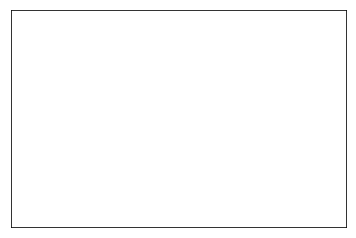

In [34]:
# Load training and eval data
train_data = hog_images_compressed
im_prices_int = []
for i in im_prices:
    im_prices_int.append(int(i))
train_labels = im_prices_int


regr = linear_model.LinearRegression()

regr.fit(train_data, train_labels)

label_pred = regr.predict(train_data)

for a,b in zip(train_labels, label_pred):
    print(a,b)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, train_labels))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_labels, label_pred))

# Plot outputs
#plt.scatter(train_data, train_labels,  color='black')
#plt.plot(train_data, label_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



#run PCA


Mean squared error: 1615704.96
Variance score: 0.50